In [51]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
import datetime
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
import scipy.io as sio
import cmocean

import sys
sys.path.append('../')


from ploting import *
import data

%matplotlib inline

pd.options.display.max_columns = 999
pd.options.display.max_rows = 100


from datetime import datetime
str(datetime.now())


'2017-08-02 19:06:11.268221'

In [52]:
import numpy as np
import matplotlib as mpl
mpl.use('pgf')

def figsize(scale):
    fig_width_pt = 469.755                          # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.27                       # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    fig_height = fig_width*golden_mean              # height in inches
    fig_size = [fig_width,fig_height]
    return fig_size

pgf_with_latex = {                      # setup matplotlib to use latex for output
    "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "serif",
    "font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
    "font.sans-serif": [],
    "font.monospace": [],
    "axes.labelsize": 10,               # LaTeX default is 10pt font.
    "text.fontsize": 10,
    "legend.fontsize": 8,               # Make the legend/label fonts a little smaller
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "figure.figsize": figsize(0.9),     # default fig size of 0.9 textwidth
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        ]
    }
mpl.rcParams.update(pgf_with_latex)

import matplotlib.pyplot as plt

# I make my own newfig and savefig functions
def newfig(width):
    plt.clf()
    fig = plt.figure(figsize=figsize(width))
    ax = fig.add_subplot(111)
    return fig, ax

def newfig_sub(width):
    plt.clf()
    fig, axes = plt.subplots(4, 1,figsize=figsize(width))
    return fig, axes

def savefig(filename):
    plt.savefig('/Users/MarkelovIgor/Google Drive/Documents/New Vansjo Paper/latex version/img/{}.pgf'.format(filename))
    plt.savefig('/Users/MarkelovIgor/Google Drive/Documents/New Vansjo Paper/latex version/img/{}.pdf'.format(filename))


/Users/MarkelovIgor/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/Users/MarkelovIgor/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:913: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [53]:
df = data.read_data('Vansjo/VAN1_data_2017_02_28_10_55.xlsx')
plotter = ResultsPlotter(f='../IO/MyLakeResults.mat')

/Users/MarkelovIgor/git/biogeochemistry/MyLake_v2_Vansjo/Postproc_code/data.py:9: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  df = df.convert_objects(convert_numeric=True)


In [54]:
save_fig = True

### Calibration period

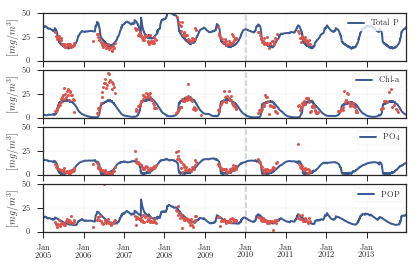

In [56]:
fig, axes = newfig_sub(1)

results = plotter.env_getter('water-column', basin=1)

inx = np.where(results['z'][0, 0] == 4)[0][0]
TOTP = np.mean(results['concentrations'][0, 0]['P'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['PP'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['DOP'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['POP'][0, 0][0:inx, :], axis=0)
Chl = np.mean(results['concentrations'][0, 0]['C'][0, 0][0:inx, :], axis=0) + np.mean(results['concentrations'][0, 0]['Chl']
                                                                                      [0, 0][0:inx, :], axis=0)
PO4 = np.mean(results['concentrations'][0, 0]['P'][0, 0][0:inx, :], axis=0)
Part = np.mean(results['concentrations'][0, 0]['POP'][0, 0][0:inx, :], axis=0) + np.mean(results['concentrations'][0, 0]['PP'][0, 0][0:inx, :], axis=0)


axes[0].plot(-366 + results['days'][0, 0][0], TOTP, c=sns.xkcd_rgb["denim blue"], lw=2, label='Total P')
axes[1].plot(-366 + results['days'][0, 0][0], Chl, c=sns.xkcd_rgb["denim blue"], lw=2, label='Chl-a')
axes[2].plot(-366 + results['days'][0, 0][0], PO4, c=sns.xkcd_rgb["denim blue"], lw=2, label='PO_4')
axes[3].plot(-366 + results['days'][0, 0][0], Part, c=sns.xkcd_rgb["denim blue"], lw=2, label='POP')


TOTP = np.loadtxt('../obs/store_obs/TOTP.dat', delimiter=',')
Chl = np.loadtxt('../obs/store_obs/Cha_aquaM_march_2017.dat', delimiter=',')
PO4 = np.loadtxt('../obs/store_obs/PO4.dat', delimiter=',')
Part = np.loadtxt('../obs/store_obs/Part.dat', delimiter=',')
axes[0].plot(-366 + TOTP[:, 0], TOTP[:, 1], 'bo', c=sns.xkcd_rgb["pale red"], markersize=3)
axes[1].plot(-366 + Chl[:, 0], Chl[:, 1], 'bo', c=sns.xkcd_rgb["pale red"], markersize=3)
axes[2].plot(-366 + PO4[:, 0], PO4[:, 1], 'bo', c=sns.xkcd_rgb["pale red"], markersize=3)
axes[3].plot(-366 + Part[:, 0], Part[:, 1], 'bo', c=sns.xkcd_rgb["pale red"], markersize=3)


for ax in axes:
    ax.grid(linestyle='-', linewidth=0.2)
    ax.set_ylim([0, 50])
    ax.set_xlim([732313 - 366, 735234 -10])
    ax.plot((732313+366*4-1, 732313+366*4-1), (0, 50), 'k--', lw=0.3)
    ax.set_ylabel(r'$[mg / m^3]$')
    ax.legend(loc=1, frameon=1)
    ax.set_xticks([], [])
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
    ax.xaxis.set_major_formatter(mdates.DateFormatter(' '))    

axes[3].xaxis.set_major_locator(mdates.MonthLocator(interval=12))
axes[3].xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))    

# plt.tight_layout()
if save_fig:
    savefig('calibration/Phosphorus')